# Calculating the concentration  & dilution in ANHA4-EXH001

This notebook summerized my work of calculating NEMO variable emp (evaporation minus preciptation) through salt-flux and seasurface salinity. Technical details are listed on 
<a href="http://ccar-modeling-documentation.readthedocs.org/en/latest/code-notes/TRC/Calculate_emps_ANHA4.html">here</a>.


In [1]:
import sys
sys.path.insert(0, '../../_libs/')

In [2]:
import glob
import scipy.io
import datetime
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [30]:
ANHA4_obj=nc.Dataset('../../_data/Exchange/coordinates_ANHA4.nc')
nav_lat = ANHA4_obj.variables['nav_lat'][:]
nav_lon = ANHA4_obj.variables['nav_lon'][:]

# Sault-flux & Sea surface salinity files

File locations: 
* /ocean/yingkai/GEOTRACES/FORCING/ANHA4/iocesafl_monmean.nc
* /ocean/yingkai/GEOTRACES/FORCING/ANHA4/isssalin_monmean.nc

In [31]:
safl_name = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/iocesafl_monmean.nc'
sss_name  = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/isssalin_monmean.nc'

In [32]:
safl_obj = nc.Dataset(safl_name)
safl = safl_obj.variables['iocesafl'][:]
sss_obj = nc.Dataset(sss_name)
sss = sss_obj.variables['isssalin'][:]

In [33]:
emps=-1.0*safl*34.7/(3600.0*24*(sss+1.0e-16))

In [35]:
bound_MAT=scipy.io.loadmat('../../_data/Exchange/Ba_boundary_ANHA4.mat')
domain = bound_MAT['domain'].T

In [36]:
for i in range(144):
    temp = emps[i, :, :]
    temp[domain==0]=np.nan

/home/yingkai/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  app.launch_new_instance()


In [37]:
lev = np.array([-9, -6, -3, -1, 1, 3, 6, 9])/5.0

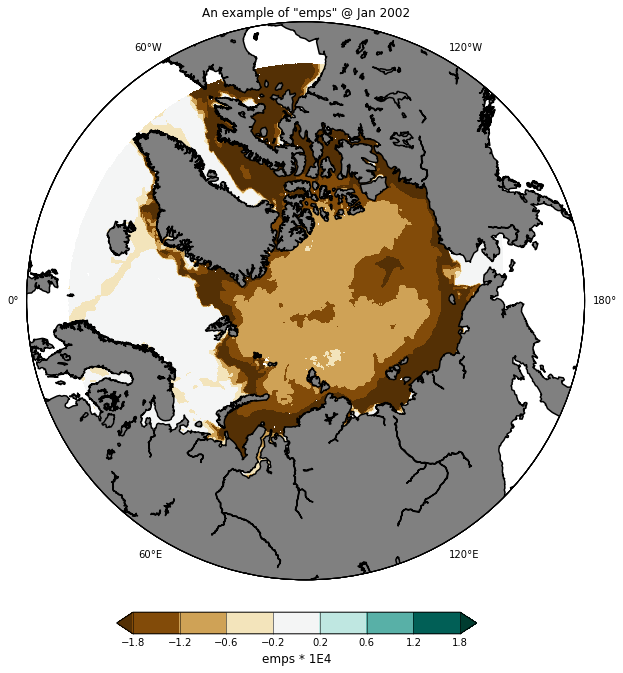

In [38]:
fig=plt.figure(figsize=(10, 10)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')

x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, emps[6, :, :]*1e4, lev, cmap=plt.cm.BrBG, extend='both')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('emps * 1E4', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)

ax.set_title('An example of "emps" @ Jan 2002')

In [55]:
save_var = { 'emps'    : emps,    \
             'nav_lat' : nav_lat, \
             'nav_lon' : nav_lon
           }
scipy.io.savemat('../../_data/Exchange/ANHA4_emps.mat', mdict=save_var)